### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
# additional dependencies we will use to visualize the data during EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

### Import the imput dataset.

In [4]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Assigment_Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# look at the data types
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [6]:
# check the shape
application_df.shape

(34299, 12)

# General Data Cleaning and Feature Selection

In [7]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN"], 1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


C:\Users\ptene\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [8]:
# check the shape
application_df.shape

(34299, 11)

 # Determine the number of unique values in each column.

In [9]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [10]:
# review Status value counts
application_df["STATUS"].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [11]:
# review Status value counts
application_df["SPECIAL_CONSIDERATIONS"].value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [12]:
# Drop the non-beneficial "STATUS" columns
application_df = application_df.drop(["SPECIAL_CONSIDERATIONS", "STATUS"], 1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              34299 non-null  object
 1   APPLICATION_TYPE  34299 non-null  object
 2   AFFILIATION       34299 non-null  object
 3   CLASSIFICATION    34299 non-null  object
 4   USE_CASE          34299 non-null  object
 5   ORGANIZATION      34299 non-null  object
 6   INCOME_AMT        34299 non-null  object
 7   ASK_AMT           34299 non-null  int64 
 8   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.4+ MB


C:\Users\ptene\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [13]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

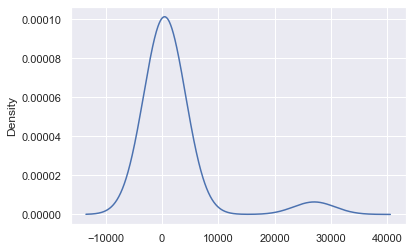

In [14]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [15]:
# list(application_counts[application_counts < 500].index)

In [16]:
# replace_application = list(application_counts[application_counts < 500].index)

In [17]:
# Determine which values to replace if counts are less than ...? For less than 100
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df["APPLICATION_TYPE"] = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [18]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

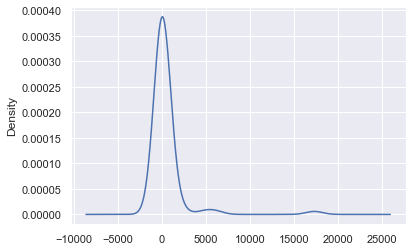

In [19]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
class_counts.plot.density()

In [20]:
class_counts < 1000

C1000    False
C2000    False
C1200    False
C3000    False
C2100    False
         ...  
C4120     True
C8210     True
C2561     True
C4500     True
C2150     True
Name: CLASSIFICATION, Length: 71, dtype: bool

In [21]:
list(class_counts[class_counts <1000].index)

['C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [22]:
# Determine which values to replace if counts are less than 1000?
replace_class = list(class_counts[class_counts <1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [23]:
application_df.nunique()

NAME                19568
APPLICATION_TYPE        9
AFFILIATION             6
CLASSIFICATION          6
USE_CASE                5
ORGANIZATION            4
INCOME_AMT              9
ASK_AMT              8747
IS_SUCCESSFUL           2
dtype: int64

In [24]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              34299 non-null  object
 1   APPLICATION_TYPE  34299 non-null  object
 2   AFFILIATION       34299 non-null  object
 3   CLASSIFICATION    34299 non-null  object
 4   USE_CASE          34299 non-null  object
 5   ORGANIZATION      34299 non-null  object
 6   INCOME_AMT        34299 non-null  object
 7   ASK_AMT           34299 non-null  int64 
 8   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.4+ MB


### Bin Names

In [25]:
## Look at NAME value counts for binning
name_counts = application_df["NAME"].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

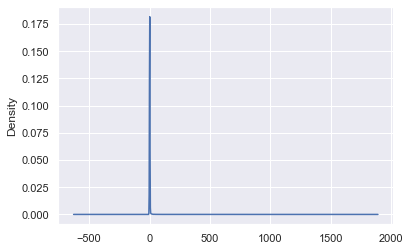

In [26]:
# Viasualize the value counts of NAME
# name_counts.plot.density()
name_counts.plot.density()

In [27]:
# how many name_counts are there less than 5?
name_counts[name_counts <= 5]

FLORIDA FAMILY CHILD CARE HOME ASSOCIATION INC                          5
GERONTOLOGICAL ADVANCED PRACTICE NURSES ASSOCIATION                     5
INTERNATIONL TRANSPLANT NURSES SOCIETY                                  5
NATIONAL ORGANIZATION FOR WOMEN INC                                     5
PTA HAWAII CONGRESS                                                     5
                                                                       ..
ST LOUIS SLAM WOMENS FOOTBALL                                           1
AIESEC ALUMNI IBEROAMERICA CORP                                         1
WEALLBLEEDRED ORG INC                                                   1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI    1
WATERHOUSE CHARITABLE TR                                                1
Name: NAME, Length: 19214, dtype: int64

In [28]:
# use binning tecnique to put those with more than 5 but les than 100 in a bucket
# Use the bucket tecnique to put those with 5 or less in a small bucket
# Determine which values to replace if counts are less than or equal to 5?
replace_application = list(name_counts[name_counts <= 5].index)

# Replace in dataframe
for app in replace_application:
    application_df["NAME"] = application_df["NAME"].replace(app,"Other")
    
# Check to make sure binning was successful
application_df["NAME"].value_counts()

Other                                           20043
PARENT BOOSTER USA INC                           1260
TOPS CLUB INC                                     765
UNITED STATES BOWLING CONGRESS INC                700
WASHINGTON STATE UNIVERSITY                       492
                                                ...  
HABITAT FOR HUMANITY INTERNATIONAL                  6
DAMAGE PREVENTION COUNCIL OF TEXAS                  6
FLEET RESERVE ASSOCIATION                           6
HUGH OBRIAN YOUTH LEADERSHIP                        6
INTERNATIONAL CONGRESS OF CHURCHES MINISTERS        6
Name: NAME, Length: 355, dtype: int64

In [29]:
application_df.dtypes

NAME                object
APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
ORGANIZATION        object
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [30]:
# [application_df.dtypes == "object"]

In [31]:
application_df.dtypes[application_df.dtypes == "object"].index.tolist()

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [32]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [33]:
# test
application_df[application_cat]

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0
1,Other,T3,Independent,C2000,Preservation,Co-operative,1-9999
2,Other,T5,CompanySponsored,C3000,ProductDev,Association,0
3,Other,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999
4,Other,T3,Independent,C1000,Heathcare,Trust,100000-499999
...,...,...,...,...,...,...,...
34294,Other,T4,Independent,C1000,ProductDev,Association,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,0
34296,Other,T3,CompanySponsored,C2000,Preservation,Association,0
34297,Other,T5,Independent,C3000,ProductDev,Association,0


In [34]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))


In [35]:
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\ptene\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [37]:
application_df.shape

(34299, 396)

In [38]:
# checking that all is numeric
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Columns: 396 entries, ASK_AMT to INCOME_AMT_5M-10M
dtypes: float64(394), int64(2)
memory usage: 103.6 MB


In [39]:
# Split our preprocessed data into our features and target arrays
X_df = application_df.drop(["IS_SUCCESSFUL"], 1)

X = X_df.values

y = application_df["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\ptene\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [40]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 3: Compare, Compile, Train and Evaluate the Model

In [41]:
# testing 
len(X_train[0])

395

# Compile the model

In [42]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = number_input_features * 3
hidden_nodes_layer2 = number_input_features * 2
hidden_nodes_layer3 = number_input_features * 1


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1185)              469260    
                                                                 
 dense_1 (Dense)             (None, 790)               936940    
                                                                 
 dense_2 (Dense)             (None, 395)               312445    
                                                                 
 dense_3 (Dense)             (None, 1)                 396       
                                                                 
Total params: 1,719,041
Trainable params: 1,719,041
Non-trainable params: 0
_________________________________________________________________


#### Implement Checkpoints

Note: Create a callback that saves the model's weights every 5 epochs

In [43]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

#### Compile the Model

In [44]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [45]:
# Create a callback that saves the model's weights every epoch (set = 5) 

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

### Train the model

# Implement Checkpoint

note: Create a callbackthat saves the model's weights every 5 epochs.

In [ ]:
# Train the model
fit_model =nn.fit(X_train_scaled,y_train,epochs=50, callbacks=[cp_callback])

Epoch 1/50
  4/804 [..............................] - ETA: 18s - loss: 0.8540 - accuracy: 0.5781  
Epoch 1: saving model to checkpoints\weights.01.hdf5
  8/804 [..............................] - ETA: 22s - loss: 0.7658 - accuracy: 0.6094
Epoch 1: saving model to checkpoints\weights.01.hdf5
 13/804 [..............................] - ETA: 22s - loss: 0.7900 - accuracy: 0.6394
Epoch 1: saving model to checkpoints\weights.01.hdf5
 18/804 [..............................] - ETA: 21s - loss: 0.7557 - accuracy: 0.6528
Epoch 1: saving model to checkpoints\weights.01.hdf5
 23/804 [..............................] - ETA: 21s - loss: 0.7235 - accuracy: 0.6753
Epoch 1: saving model to checkpoints\weights.01.hdf5
 28/804 [>.............................] - ETA: 21s - loss: 0.6967 - accuracy: 0.6853
Epoch 1: saving model to checkpoints\weights.01.hdf5
 33/804 [>.............................] - ETA: 21s - loss: 0.6782 - accuracy: 0.6941
Epoch 1: saving model to checkpoints\weights.01.hdf5
 38/804 [>....

<AxesSubplot:>

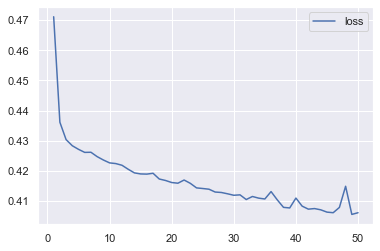

In [49]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))


# Plot the loss
history_df.plot(y="loss")

#### Evaluate the model (for loss and accuracy) using the test data

<AxesSubplot:>

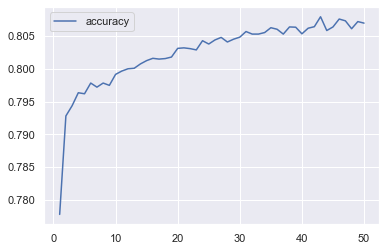

In [50]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [51]:
# Evaluate the completed model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4970 - accuracy: 0.7887 - 1s/epoch - 5ms/step
Loss: 0.4970085918903351, Accuracy: 0.788688063621521


#### Save the moel in HDF5 format

In [52]:
# Export our model to HDF5 file
nn.save("./Trained_Models/AlphabetSoupCharity_D2.h5")

### Import model (check)

In [53]:
# Import the model to a new object 
nn_imported = tf.keras.models.load_model("./Trained_Models/AlphabetSoupCharity_D2.h5")

In [54]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4970 - accuracy: 0.7887 - 1s/epoch - 4ms/step
Loss: 0.4970085918903351, Accuracy: 0.788688063621521


In [55]:
# Import our dependencies
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [56]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=200, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

#Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.776


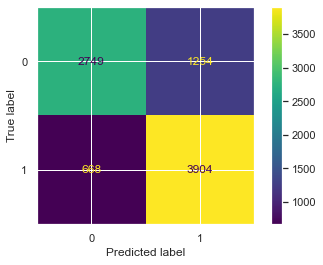

In [57]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# display the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= rf_model.classes_)
disp.plot()
plt.savefig("./Images/RandomForestClassifier_confusion_matrix.png")
plt.show()

In [58]:
# Print the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      4003
           1       0.76      0.85      0.80      4572

    accuracy                           0.78      8575
   macro avg       0.78      0.77      0.77      8575
weighted avg       0.78      0.78      0.77      8575



In [59]:
# get feature importances using importances = forest.feature_importances_
# create feature importances from model
importances = rf_model.feature_importances_

# get column names
columns = X_df.columns

# create a dataframe
feature_importances_df = pd.DataFrame({
    'feature':columns,
    'importance':importances
})


feature_importances_df.sort_values(by=['importance'], ascending=False, inplace=True)
feature_importances_df.reset_index(drop=True, inplace=True)
feature_importances_df

,feature,importance
0,ASK_AMT,0.274360
1,NAME_Other,0.072332
2,AFFILIATION_Independent,0.059615
3,AFFILIATION_CompanySponsored,0.055770
4,ORGANIZATION_Association,0.019687
...,...,...
390,NAME_DEPARTMENT OF UTAH LADIES AUXILIARY TO TH...,0.000018
391,NAME_VFW AUXILIARY DEPT OF HAWAII,0.000016
392,NAME_DAUGHTERS OF CHARITY HEALTH SYSTEM,0.000012
393,NAME_VETERANS OF FOREIGN WARS DEPARTMENT OF KA...,0.000009


C:\Users\ptene\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  del sys.path[0]


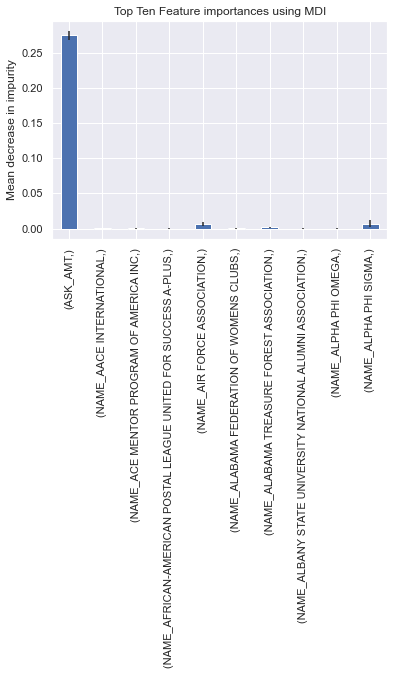

In [61]:
# visualize the top ten features-importances_
importances = rf_model.feature_importances_[: 10]
std = np.std([
    tree.feature_importances_[: 10] for tree in rf_model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=[X_df.columns[: 10]])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Top Ten Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.savefig("./Images/ForestClassifier_feature_importance.png")
fig.tight_layout()
